In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
import warnings
from pyramid.arima import auto_arima

warnings.filterwarnings('ignore')
plt.style.use('bmh')
%matplotlib inline

In [2]:
# Load the dataset
data = pd.read_csv('../raw data/LTC-USD.csv')

In [3]:
# Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data.resample('D').mean()
data = data.ffill()

In [4]:
# Check missing values
np.where(np.isnan(data))

(array([], dtype=int64), array([], dtype=int64))

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-23,3.0,3.0,3.0,3.0,3.0,8.0
2013-10-24,3.0,3.0,3.0,3.0,3.0,0.0
2013-10-25,3.0,3.0,3.0,3.0,3.0,0.0
2013-10-26,3.0,3.0,3.0,3.0,3.0,0.0
2013-10-27,3.0,3.0,3.0,3.0,3.0,0.0


In [6]:
data.index

DatetimeIndex(['2013-10-23', '2013-10-24', '2013-10-25', '2013-10-26',
               '2013-10-27', '2013-10-28', '2013-10-29', '2013-10-30',
               '2013-10-31', '2013-11-01',
               ...
               '2019-03-23', '2019-03-24', '2019-03-25', '2019-03-26',
               '2019-03-27', '2019-03-28', '2019-03-29', '2019-03-30',
               '2019-03-31', '2019-04-01'],
              dtype='datetime64[ns]', name='Date', length=1987, freq='D')

<table><tr><td bgcolor=orange><font size=3> SARIMA for "High"

In [7]:
y = data['High']

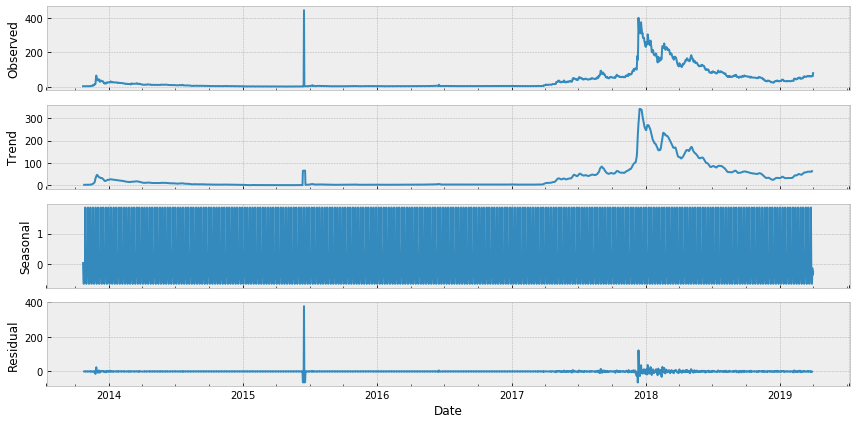

In [8]:
rcParams['figure.figsize'] = 12, 6

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

In [9]:
# y = y['2016':]

In [10]:
# rcParams['figure.figsize'] = 12, 6

# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()

### Build a Baseline Model

In [11]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.resample('MS').mean()
    rolstd = timeseries.resample('MS').std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    print()
    #Perform Ljung-Box test:
    print('Results of Ljung-Box Test:')
    lbtest = acorr_ljungbox(timeseries, lags=5)
    for i in range(5):
        print('Largest Lag Included:{} Test Statistic={}  p-value={}'.format(i, lbtest[0][i], lbtest[1][i]))

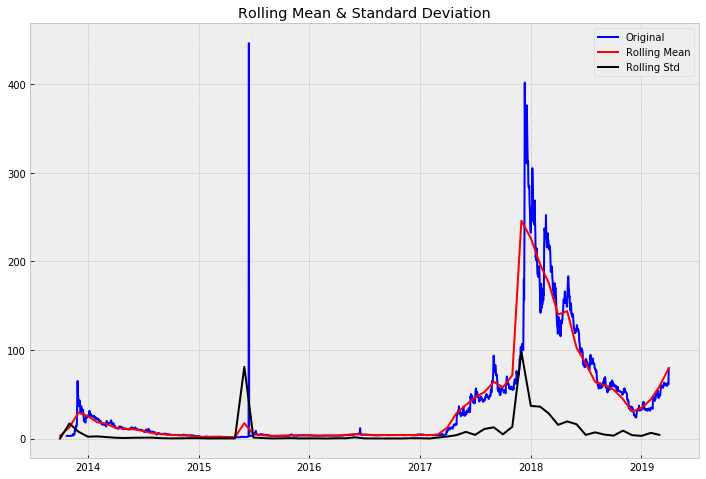

Results of Dickey-Fuller Test:
Test Statistic                   -2.463146
p-value                           0.124701
#Lags Used                        5.000000
Number of Observations Used    1981.000000
Critical Value (1%)              -3.433655
Critical Value (5%)              -2.863000
Critical Value (10%)             -2.567547
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=1851.9559150004932  p-value=0.0
Largest Lag Included:1 Test Statistic=3678.9857631804334  p-value=0.0
Largest Lag Included:2 Test Statistic=5489.380413724371  p-value=0.0
Largest Lag Included:3 Test Statistic=7279.935742396417  p-value=0.0
Largest Lag Included:4 Test Statistic=9049.565264207491  p-value=0.0


In [12]:
test_stationarity(y)

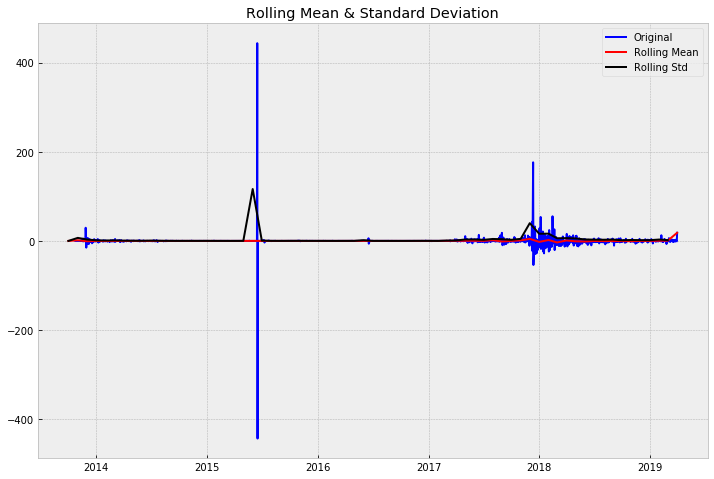

Results of Dickey-Fuller Test:
Test Statistic                  -25.834334
p-value                           0.000000
#Lags Used                        4.000000
Number of Observations Used    1981.000000
Critical Value (1%)              -3.433655
Critical Value (5%)              -2.863000
Critical Value (10%)             -2.567547
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=326.59892383357504  p-value=5.291243624436994e-73
Largest Lag Included:1 Test Statistic=328.46781918610964  p-value=4.72192758326992e-72
Largest Lag Included:2 Test Statistic=328.77013990641115  p-value=5.890775190308529e-71
Largest Lag Included:3 Test Statistic=328.8108447646753  p-value=6.579335107544769e-70
Largest Lag Included:4 Test Statistic=328.85717329145433  p-value=6.220964614128956e-69


In [13]:
test_stationarity(y.diff(1).dropna())

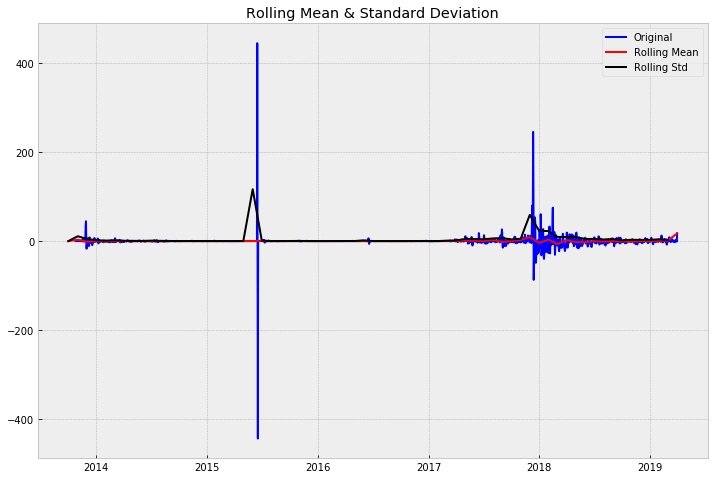

Results of Dickey-Fuller Test:
Test Statistic                -8.547400e+00
p-value                        9.421782e-14
#Lags Used                     2.600000e+01
Number of Observations Used    1.958000e+03
Critical Value (1%)           -3.433694e+00
Critical Value (5%)           -2.863017e+00
Critical Value (10%)          -2.567556e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=35.22139326502947  p-value=2.9427307699891335e-09
Largest Lag Included:1 Test Statistic=325.4704017341493  p-value=2.113490266251457e-71
Largest Lag Included:2 Test Statistic=325.473507437027  p-value=3.0468564383714943e-70
Largest Lag Included:3 Test Statistic=325.8590862032174  p-value=2.8526974925580706e-69
Largest Lag Included:4 Test Statistic=326.1157977378289  p-value=2.419467803195127e-68


In [14]:
test_stationarity(y.diff(2).dropna())

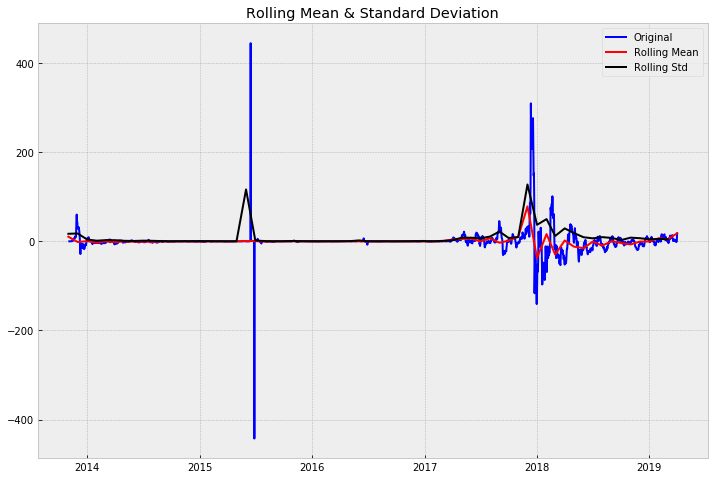

Results of Dickey-Fuller Test:
Test Statistic                -8.162632e+00
p-value                        9.057327e-13
#Lags Used                     2.500000e+01
Number of Observations Used    1.949000e+03
Critical Value (1%)           -3.433710e+00
Critical Value (5%)           -2.863024e+00
Critical Value (10%)          -2.567560e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=853.4280215538543  p-value=1.3071005001095535e-187
Largest Lag Included:1 Test Statistic=1530.6602125880902  p-value=0.0
Largest Lag Included:2 Test Statistic=2101.5728868695887  p-value=0.0
Largest Lag Included:3 Test Statistic=2551.089160558125  p-value=0.0
Largest Lag Included:4 Test Statistic=2884.363352123691  p-value=0.0


In [15]:
test_stationarity(y.diff(12).dropna())

#### According to the decomposition of y_train, seasonality is relatively small. 
#### Comparing the results of the first and second difference, we use the first difference.

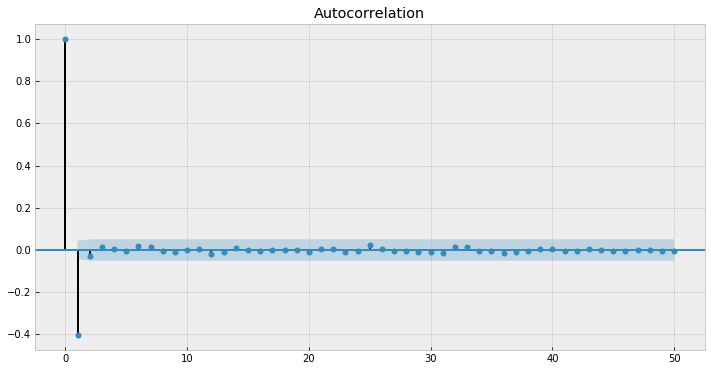

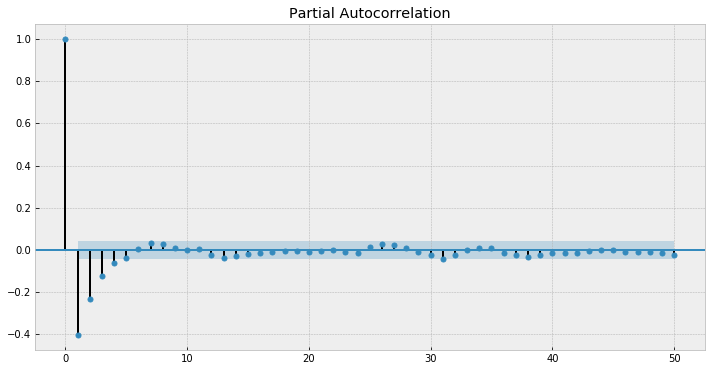

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
acf = plot_acf(y.diff(1).dropna(), lags=50)
pacf = plot_pacf(y.diff(1).dropna(), lags=50)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5422      0.002   -279.890      0.000      -0.546      -0.538
sigma2       182.5977      0.324    562.729      0.000     181.962     183.234
15965.714406427365


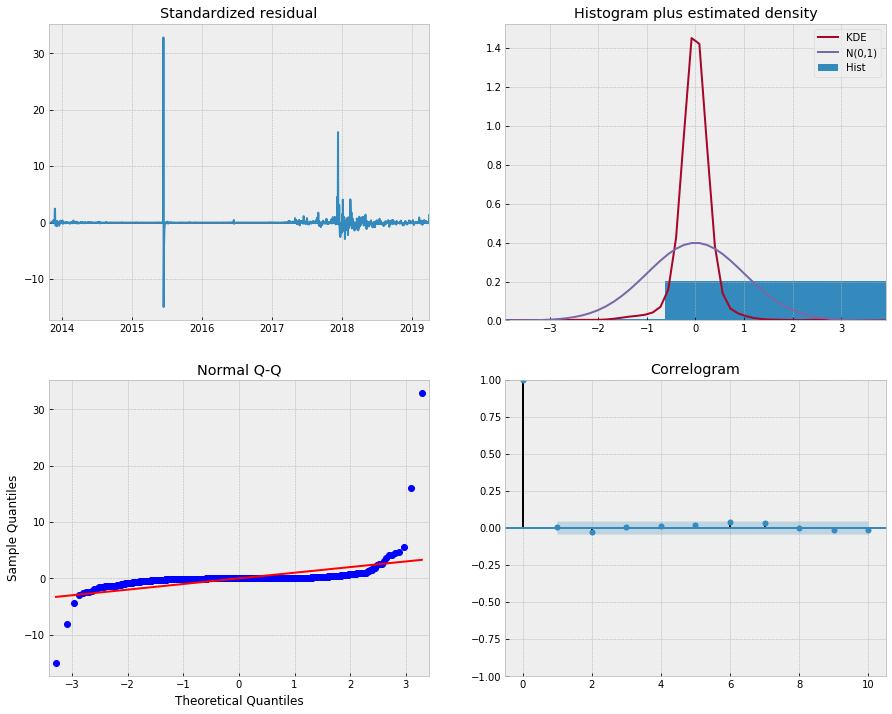

In [17]:
mod_baseline = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order = (0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_baseline = mod_baseline.fit()

print(results_baseline.summary().tables[1])
print(results_baseline.aic)
b = results_baseline.plot_diagnostics(figsize=(15, 12))

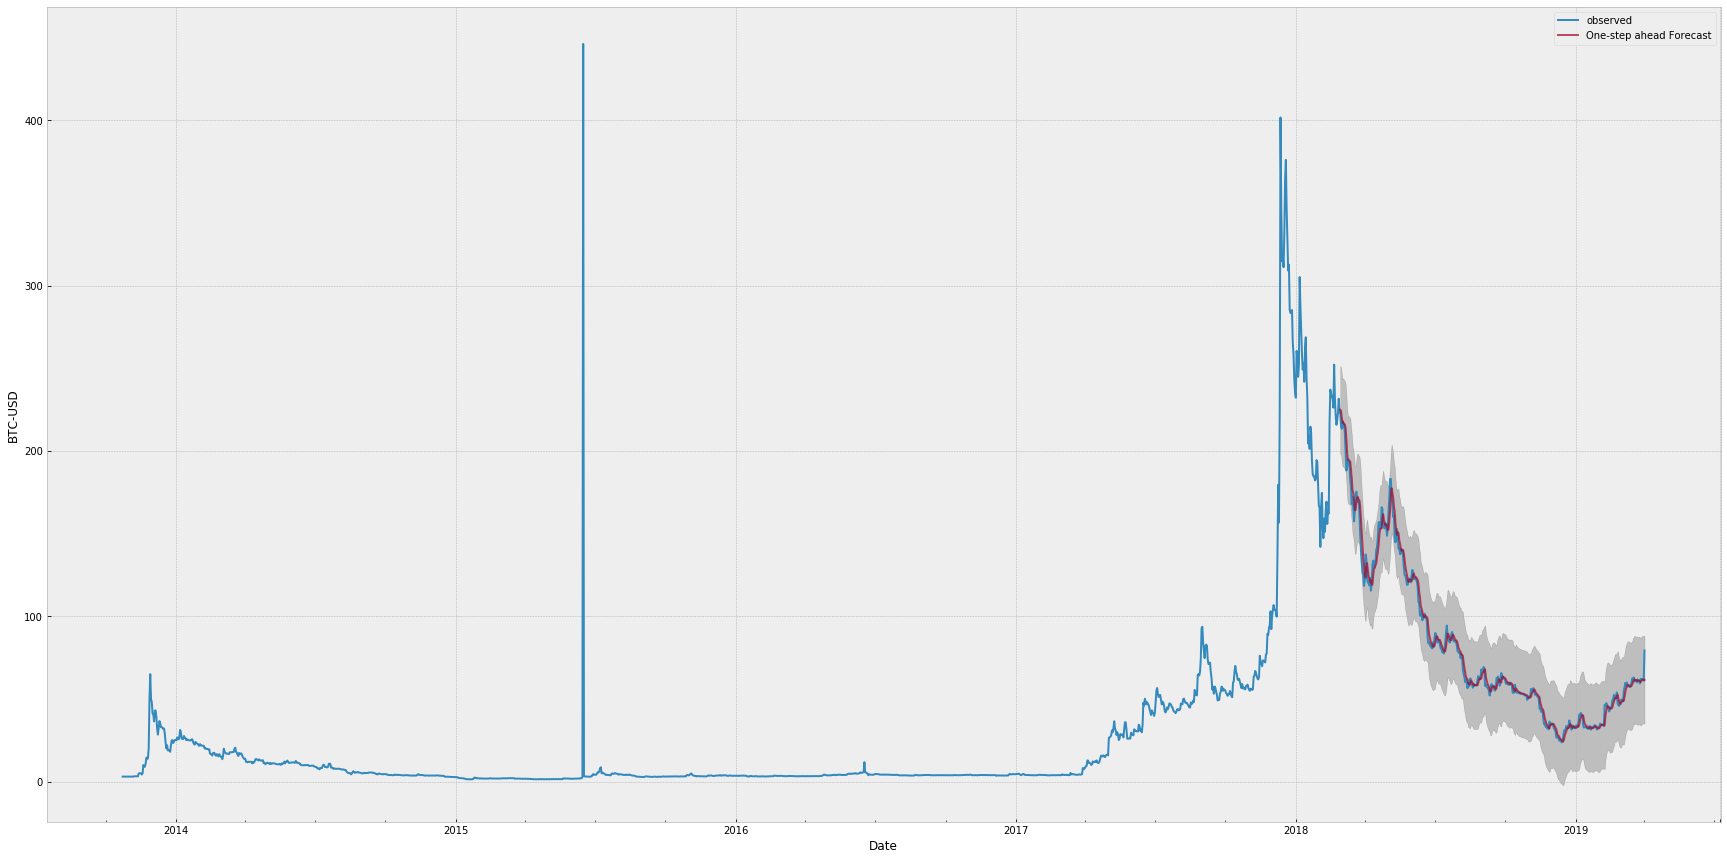

In [18]:
pred = results_baseline.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [19]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 24.6743
The R2 of our model is 0.9888


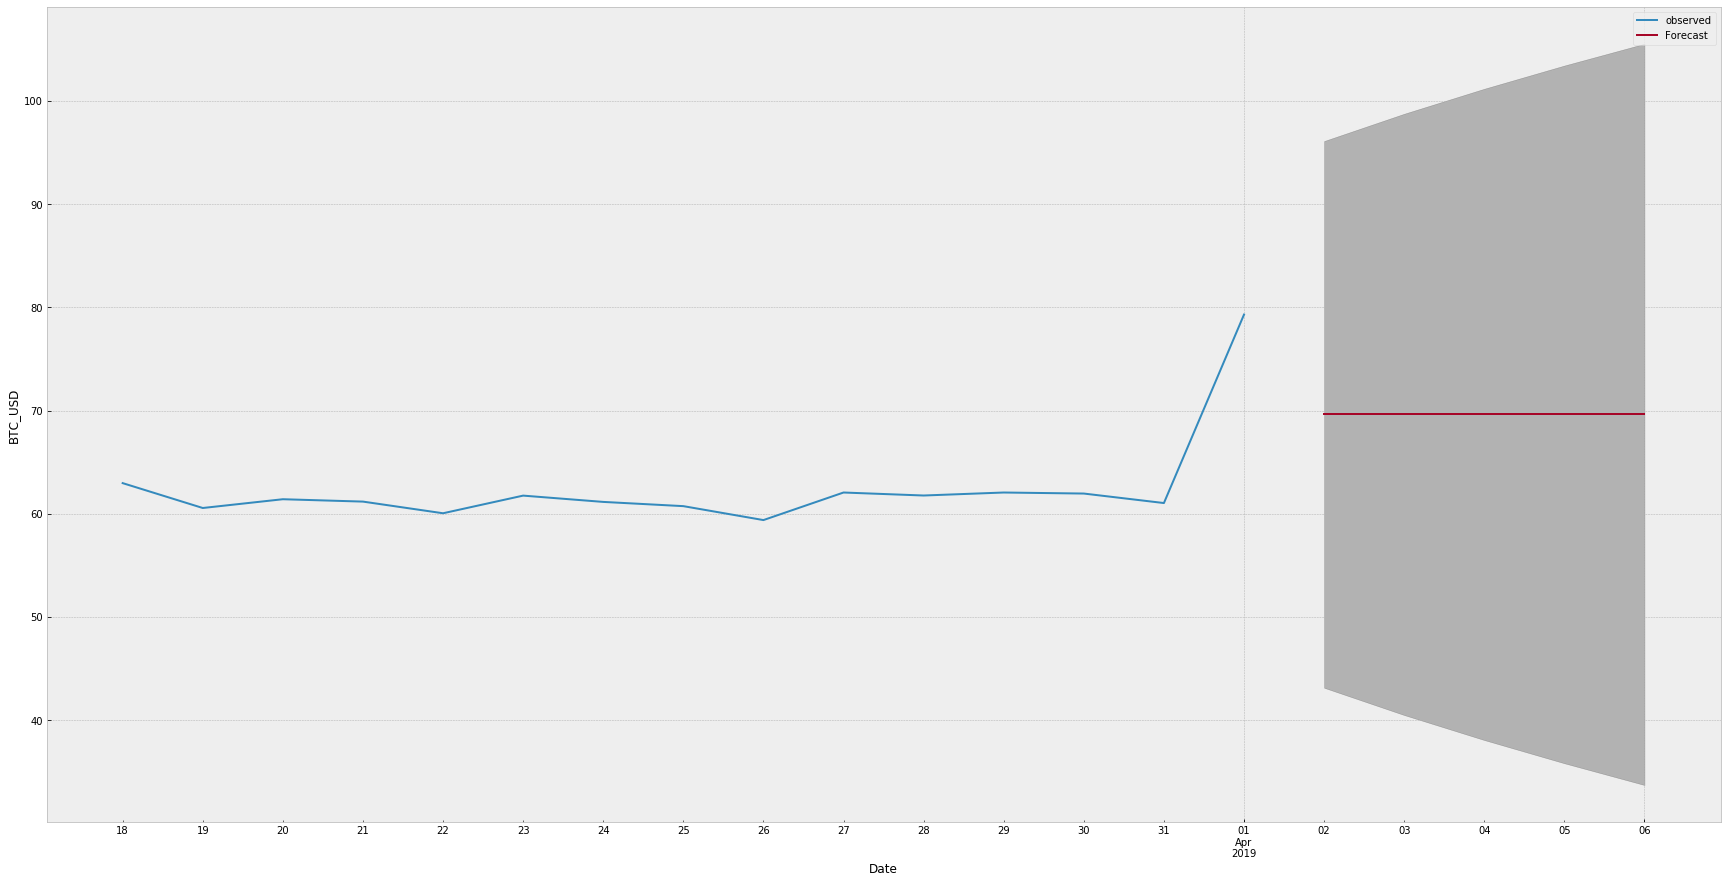

In [20]:
# Forcast the future
pred_uc = results_baseline.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

### Build an Advanced Model by Grid Search

In [21]:
d = [1]
p = q = range(21)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(0, 0, 0, 12)]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-1], seasonal_pdq[0]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 0, 0, 12)
SARIMAX: (0, 1, 2) x (0, 0, 0, 12)
SARIMAX: (20, 1, 19) x (0, 0, 0, 12)
SARIMAX: (20, 1, 20) x (0, 0, 0, 12)


In [22]:
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)

        except:
            continue

print('Finished...')

AIC_list = AIC_list.dropna()
m = np.amin(AIC_list['AIC'].values) # Find the minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find the index number of the lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]

ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:16474.330993809825
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:15965.714406427365
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:15960.52964747007
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:15952.974049293669
ARIMA(0, 1, 4)x(0, 0, 0, 12)12 - AIC:15946.342736553775
ARIMA(0, 1, 5)x(0, 0, 0, 12)12 - AIC:15939.692252854085
ARIMA(0, 1, 6)x(0, 0, 0, 12)12 - AIC:15932.753208721579
ARIMA(0, 1, 7)x(0, 0, 0, 12)12 - AIC:15927.700321611886
ARIMA(0, 1, 8)x(0, 0, 0, 12)12 - AIC:15921.274954155368
ARIMA(0, 1, 9)x(0, 0, 0, 12)12 - AIC:15914.831442670016
ARIMA(0, 1, 10)x(0, 0, 0, 12)12 - AIC:15909.177030917112
ARIMA(0, 1, 11)x(0, 0, 0, 12)12 - AIC:15902.967153932448
ARIMA(0, 1, 12)x(0, 0, 0, 12)12 - AIC:15896.216174895912
ARIMA(0, 1, 13)x(0, 0, 0, 12)12 - AIC:15891.054888341383
ARIMA(0, 1, 14)x(0, 0, 0, 12)12 - AIC:15886.004229690785
ARIMA(0, 1, 15)x(0, 0, 0, 12)12 - AIC:15880.460882230424
ARIMA(0, 1, 16)x(0, 0, 0, 12)12 - AIC:15874.845638771014
ARIMA(0, 1, 17)x(0, 0, 0, 12)12 - AIC:1586

ARIMA(6, 1, 20)x(0, 0, 0, 12)12 - AIC:15860.582474285351
ARIMA(7, 1, 0)x(0, 0, 0, 12)12 - AIC:15935.90250680242
ARIMA(7, 1, 1)x(0, 0, 0, 12)12 - AIC:15936.711223427608
ARIMA(7, 1, 2)x(0, 0, 0, 12)12 - AIC:15935.930537603976
ARIMA(7, 1, 3)x(0, 0, 0, 12)12 - AIC:15940.734828653074
ARIMA(7, 1, 4)x(0, 0, 0, 12)12 - AIC:15943.393234747331
ARIMA(7, 1, 5)x(0, 0, 0, 12)12 - AIC:15948.015406601015
ARIMA(7, 1, 6)x(0, 0, 0, 12)12 - AIC:15943.487923380242
ARIMA(7, 1, 7)x(0, 0, 0, 12)12 - AIC:15934.449929827064
ARIMA(7, 1, 8)x(0, 0, 0, 12)12 - AIC:15929.132832823301
ARIMA(7, 1, 9)x(0, 0, 0, 12)12 - AIC:15928.098401700816
ARIMA(7, 1, 10)x(0, 0, 0, 12)12 - AIC:15918.345544376207
ARIMA(7, 1, 11)x(0, 0, 0, 12)12 - AIC:15913.085905307962
ARIMA(7, 1, 12)x(0, 0, 0, 12)12 - AIC:15904.198935933102
ARIMA(7, 1, 13)x(0, 0, 0, 12)12 - AIC:15905.49148906703
ARIMA(7, 1, 14)x(0, 0, 0, 12)12 - AIC:15905.593243262903
ARIMA(7, 1, 15)x(0, 0, 0, 12)12 - AIC:15894.131495172514
ARIMA(7, 1, 16)x(0, 0, 0, 12)12 - AIC:15886

ARIMA(13, 1, 18)x(0, 0, 0, 12)12 - AIC:15885.797329557527
ARIMA(13, 1, 19)x(0, 0, 0, 12)12 - AIC:15879.036202448087
ARIMA(13, 1, 20)x(0, 0, 0, 12)12 - AIC:15875.071264354594
ARIMA(14, 1, 0)x(0, 0, 0, 12)12 - AIC:15893.386488048878
ARIMA(14, 1, 1)x(0, 0, 0, 12)12 - AIC:15893.957010383987
ARIMA(14, 1, 2)x(0, 0, 0, 12)12 - AIC:15895.909086720061
ARIMA(14, 1, 3)x(0, 0, 0, 12)12 - AIC:15897.867778603075
ARIMA(14, 1, 4)x(0, 0, 0, 12)12 - AIC:15899.86933755453
ARIMA(14, 1, 5)x(0, 0, 0, 12)12 - AIC:15926.467325367666
ARIMA(14, 1, 6)x(0, 0, 0, 12)12 - AIC:15906.9931678835
ARIMA(14, 1, 7)x(0, 0, 0, 12)12 - AIC:15902.049440260458
ARIMA(14, 1, 8)x(0, 0, 0, 12)12 - AIC:15903.639715579866
ARIMA(14, 1, 9)x(0, 0, 0, 12)12 - AIC:15909.882249681203
ARIMA(14, 1, 10)x(0, 0, 0, 12)12 - AIC:15909.705332309088
ARIMA(14, 1, 11)x(0, 0, 0, 12)12 - AIC:16046.754682514676
ARIMA(14, 1, 12)x(0, 0, 0, 12)12 - AIC:15918.774450535506
ARIMA(14, 1, 13)x(0, 0, 0, 12)12 - AIC:15927.173603714327
ARIMA(14, 1, 14)x(0, 0, 0, 

ARIMA(20, 1, 14)x(0, 0, 0, 12)12 - AIC:15889.44463397333
ARIMA(20, 1, 15)x(0, 0, 0, 12)12 - AIC:15886.06848457093
ARIMA(20, 1, 16)x(0, 0, 0, 12)12 - AIC:15889.341102616652
ARIMA(20, 1, 17)x(0, 0, 0, 12)12 - AIC:15885.66006070124
ARIMA(20, 1, 18)x(0, 0, 0, 12)12 - AIC:15888.296752491393
ARIMA(20, 1, 19)x(0, 0, 0, 12)12 - AIC:15886.567251049939
ARIMA(20, 1, 20)x(0, 0, 0, 12)12 - AIC:15893.405688074765
Finished...


### Min_AIC_list ### 
param                (0, 1, 20)
param_seasonal    (0, 0, 0, 12)
AIC                     15853.1
Name: 20, dtype: object
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5437      0.002   -270.657      0.000      -0.548      -0.540
ma.L2         -0.0277      0.004     -6.732      0.000      -0.036      -0.020
ma.L3          0.0225      0.006      3.938      0.000       0.011       0.034
ma.L4          0.0129      0.009      1.386      0.166      -0.005       0.031
ma.L5          0.0124      0.015      0.839      0.401      -0.017       0.041
ma.L6          0.0313      0.016      2.008      0.045       0.001       0.062
ma.L7          0.0098      0.028      0.344      0.731      -0.046       0.066
ma.L8         -0.0140      0.039     -0.355      0.722      -0.091       0.063
ma.L9         -0.0178      0.027     -0.648      0.517      -0.072  

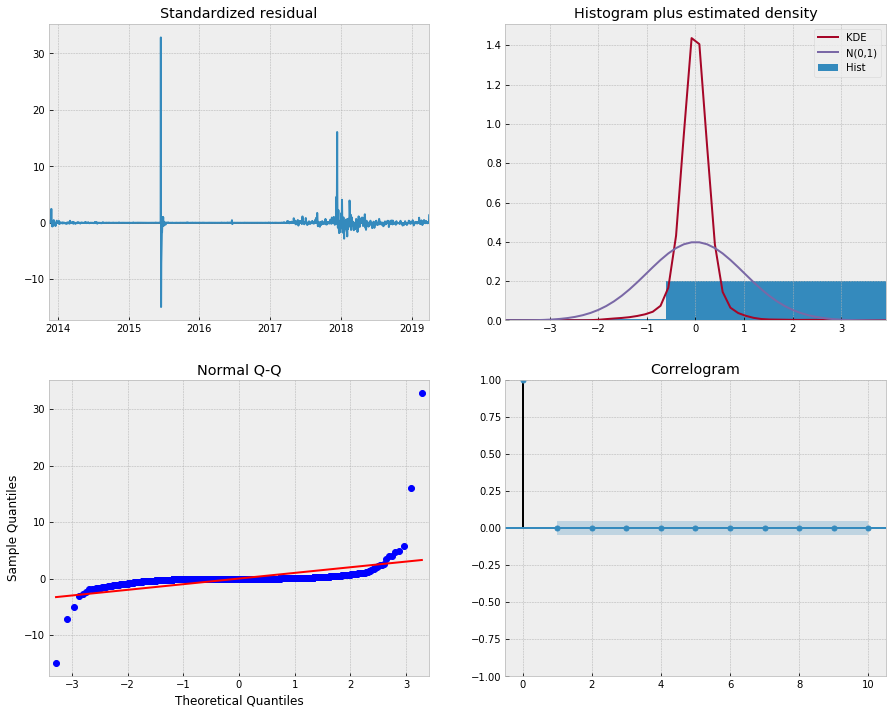

In [23]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])
dia = results.plot_diagnostics(figsize=(15, 12))

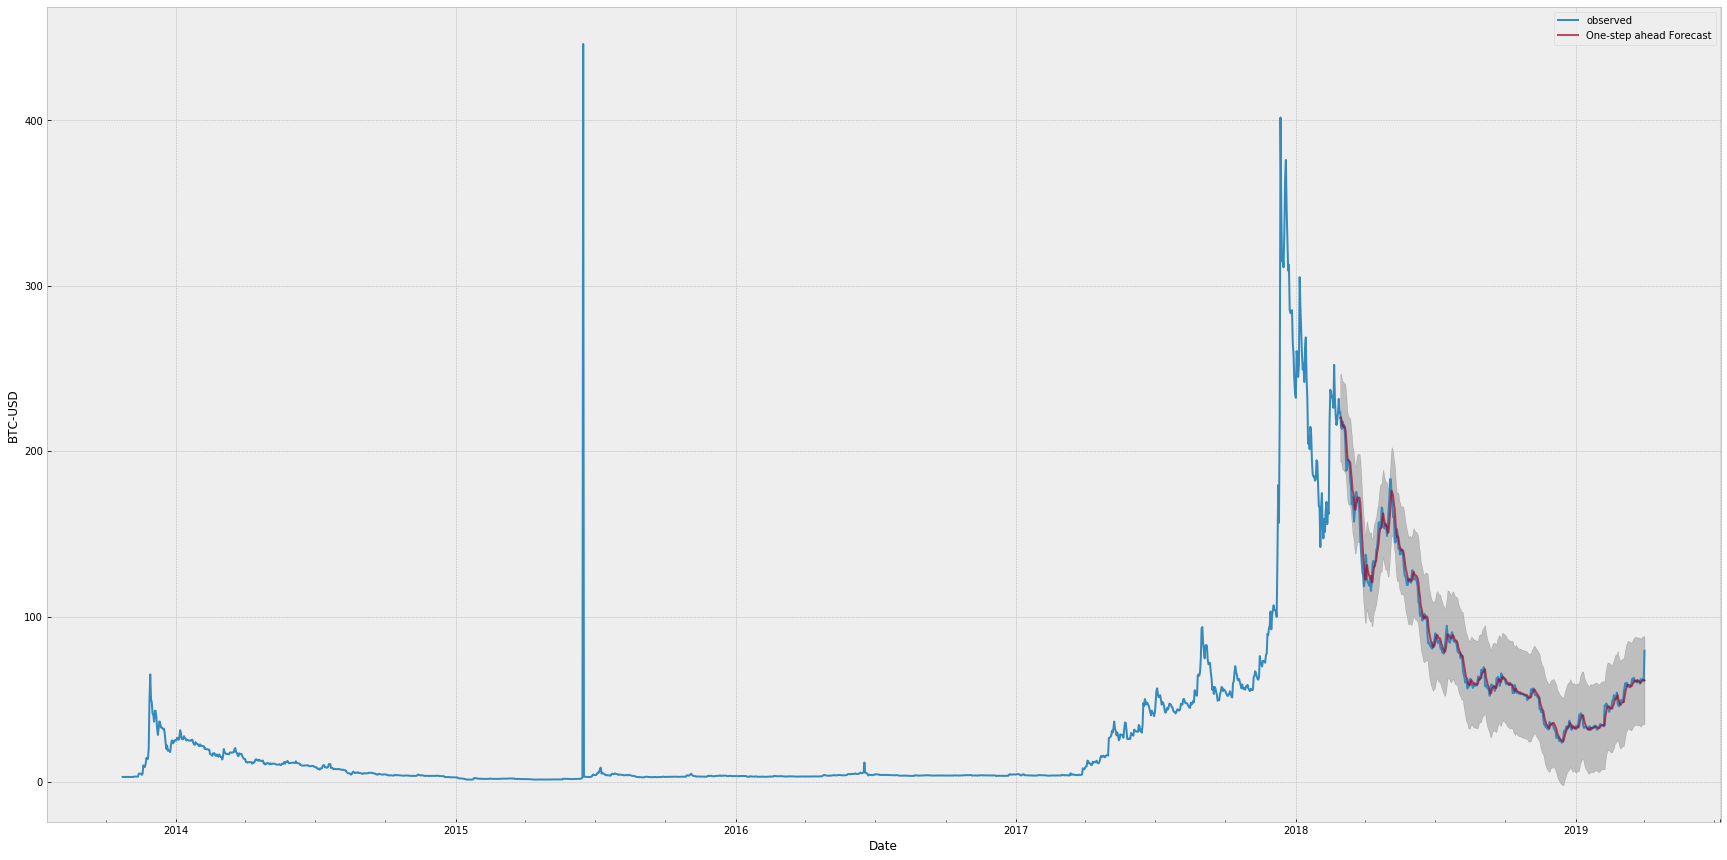

In [24]:
pred = results.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [25]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 26.2082
The R2 of our model is 0.9881


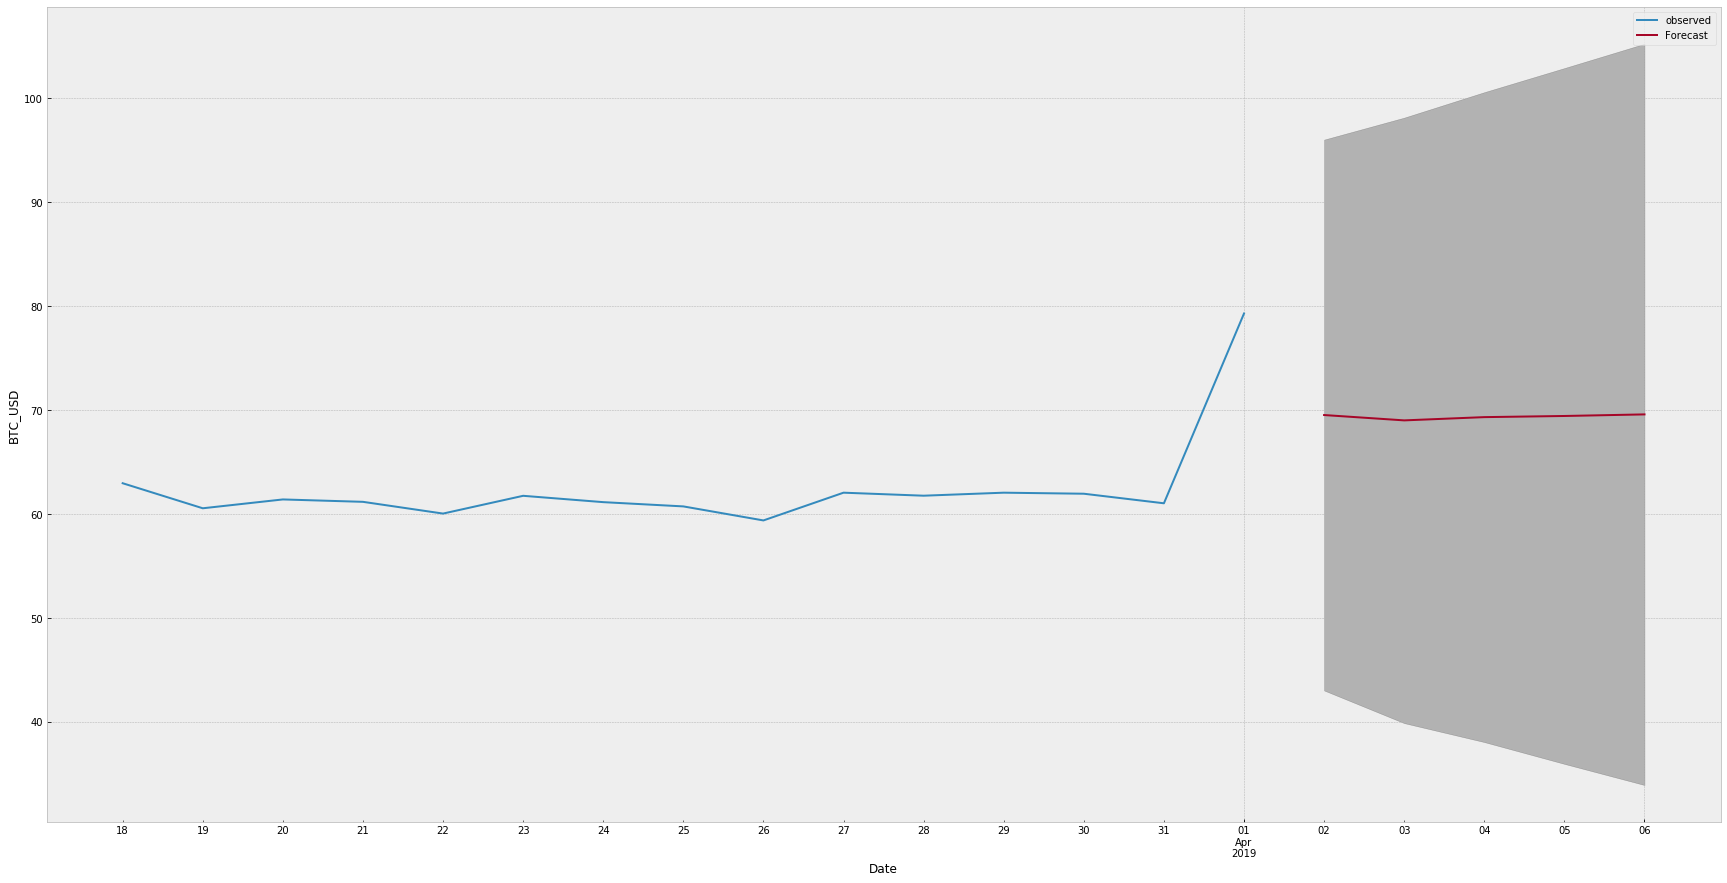

In [26]:
# Forcast the future
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

#### The advanced model fails to outperform the baseline model.

<table><tr><td bgcolor=orange><font size=3> SARIMA for "Low"

In [27]:
y = data['Low']

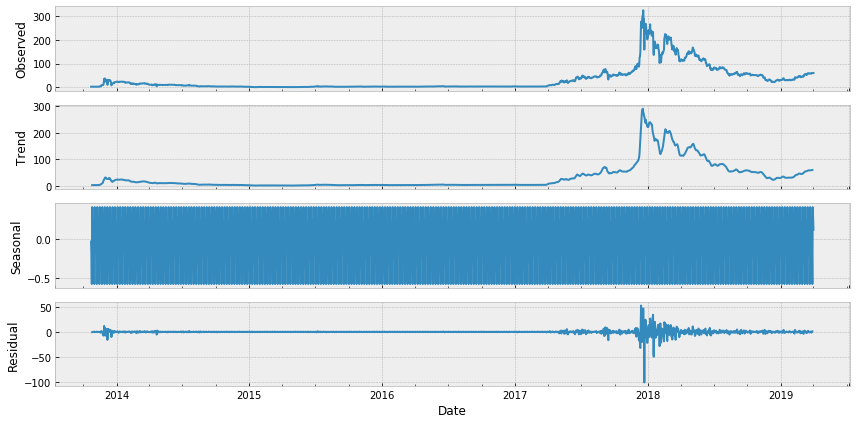

In [28]:
rcParams['figure.figsize'] = 12, 6

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

In [29]:
# y = y['2017':]

In [30]:
# rcParams['figure.figsize'] = 12, 6

# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()

### Build a Baseline Model

In [31]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.resample('MS').mean()
    rolstd = timeseries.resample('MS').std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    print()
    #Perform Ljung-Box test:
    print('Results of Ljung-Box Test:')
    lbtest = acorr_ljungbox(timeseries, lags=5)
    for i in range(5):
        print('Largest Lag Included:{} Test Statistic={}  p-value={}'.format(i, lbtest[0][i], lbtest[1][i]))

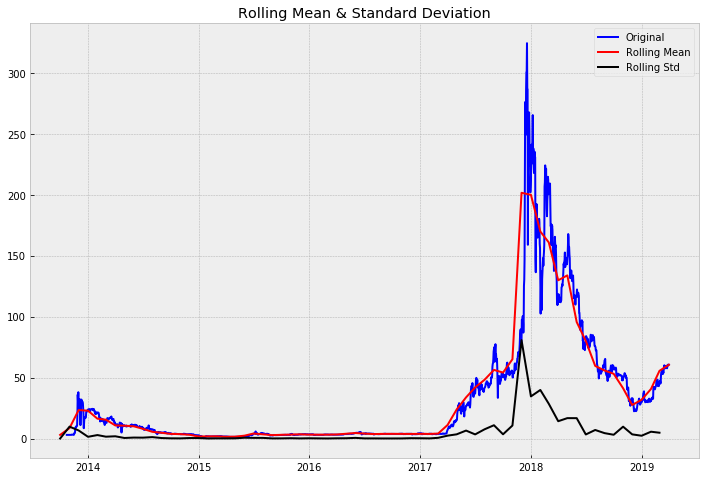

Results of Dickey-Fuller Test:
Test Statistic                   -2.651004
p-value                           0.082907
#Lags Used                       26.000000
Number of Observations Used    1960.000000
Critical Value (1%)              -3.433691
Critical Value (5%)              -2.863016
Critical Value (10%)             -2.567556
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=1960.5167219760333  p-value=0.0
Largest Lag Included:1 Test Statistic=3899.3744282062767  p-value=0.0
Largest Lag Included:2 Test Statistic=5813.616462856974  p-value=0.0
Largest Lag Included:3 Test Statistic=7709.86160851322  p-value=0.0
Largest Lag Included:4 Test Statistic=9585.792980918306  p-value=0.0


In [32]:
test_stationarity(y)

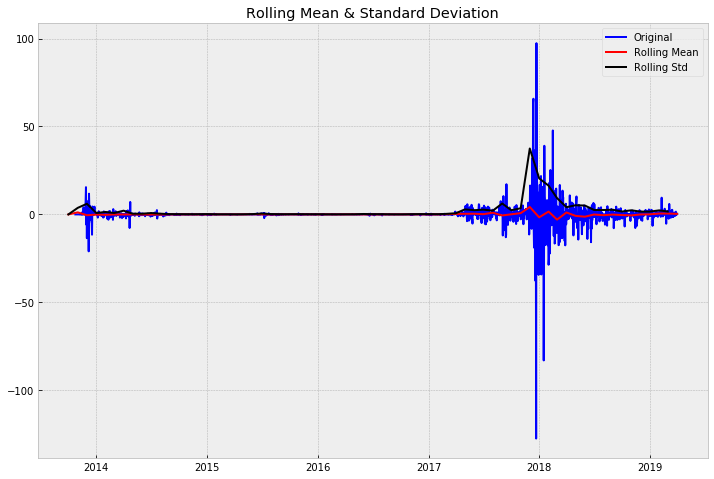

Results of Dickey-Fuller Test:
Test Statistic                -8.280596e+00
p-value                        4.530824e-13
#Lags Used                     2.600000e+01
Number of Observations Used    1.959000e+03
Critical Value (1%)           -3.433692e+00
Critical Value (5%)           -2.863017e+00
Critical Value (10%)          -2.567556e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=26.79656333119441  p-value=2.26038963565948e-07
Largest Lag Included:1 Test Statistic=32.60072257691666  p-value=8.333799340478822e-08
Largest Lag Included:2 Test Statistic=58.80242826672007  p-value=1.0593964034171678e-12
Largest Lag Included:3 Test Statistic=62.38911672931318  p-value=9.123425053074765e-13
Largest Lag Included:4 Test Statistic=62.90447689303066  p-value=3.0468445010211235e-12


In [33]:
test_stationarity(y.diff(1).dropna())

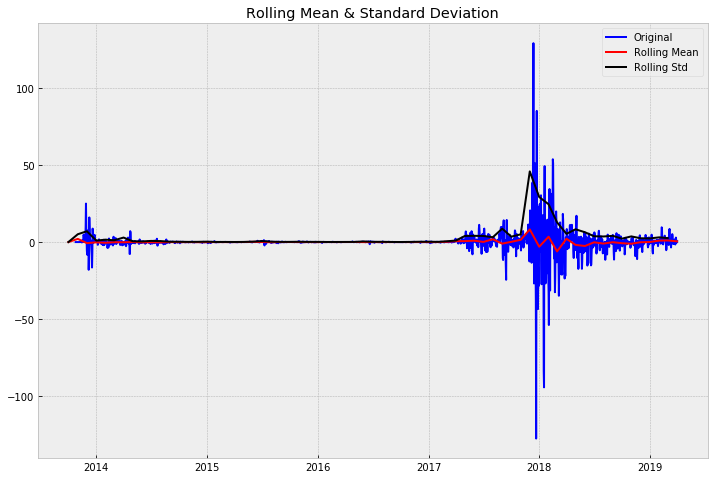

Results of Dickey-Fuller Test:
Test Statistic                -8.473319e+00
p-value                        1.457751e-13
#Lags Used                     2.500000e+01
Number of Observations Used    1.959000e+03
Critical Value (1%)           -3.433692e+00
Critical Value (5%)           -2.863017e+00
Critical Value (10%)          -2.567556e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=429.65642322496365  p-value=1.9304900468481002e-95
Largest Lag Included:1 Test Statistic=439.24954414408256  p-value=4.151197535498509e-96
Largest Lag Included:2 Test Statistic=450.511681373869  p-value=2.525720424579145e-97
Largest Lag Included:3 Test Statistic=451.8560312564227  p-value=1.7242396223026262e-96
Largest Lag Included:4 Test Statistic=456.63631063848015  p-value=1.8184843952110646e-96


In [34]:
test_stationarity(y.diff(2).dropna())

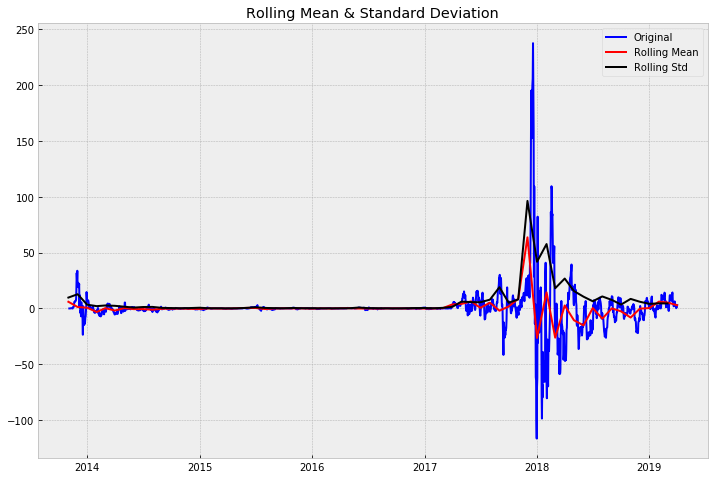

Results of Dickey-Fuller Test:
Test Statistic                -8.522343e+00
p-value                        1.092086e-13
#Lags Used                     2.600000e+01
Number of Observations Used    1.948000e+03
Critical Value (1%)           -3.433711e+00
Critical Value (5%)           -2.863025e+00
Critical Value (10%)          -2.567560e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=1574.6641085811846  p-value=0.0
Largest Lag Included:1 Test Statistic=2886.0182347339805  p-value=0.0
Largest Lag Included:2 Test Statistic=3908.163499109919  p-value=0.0
Largest Lag Included:3 Test Statistic=4701.692556907476  p-value=0.0
Largest Lag Included:4 Test Statistic=5276.855430296483  p-value=0.0


In [35]:
test_stationarity(y.diff(12).dropna())

#### According to the decomposition of y_train, seasonality is relatively small. 
#### Comparing the results of the first and second difference, we use the first difference.

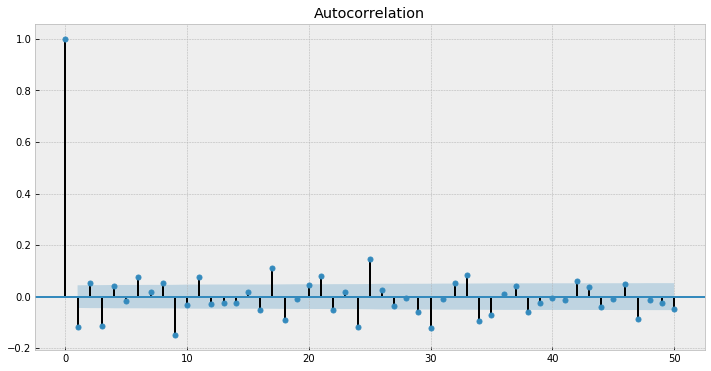

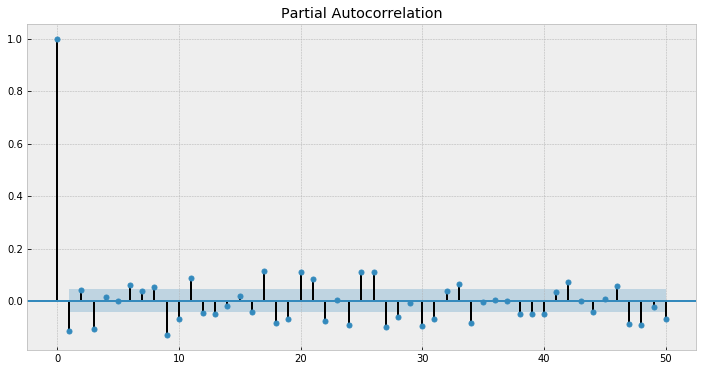

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
acf = plot_acf(y.diff(1).dropna(), lags=50)
pacf = plot_pacf(y.diff(1).dropna(), lags=50)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6857      0.025     26.932      0.000       0.636       0.736
ar.L2          0.2738      0.035      7.922      0.000       0.206       0.342
ar.L3         -0.7536      0.020    -38.511      0.000      -0.792      -0.715
ma.L1         -0.8710      0.024    -36.662      0.000      -0.918      -0.824
ma.L2         -0.1194      0.038     -3.121      0.002      -0.194      -0.044
ma.L3          0.7498      0.027     27.482      0.000       0.696       0.803
sigma2        33.0778      0.503     65.717      0.000      32.091      34.064
12716.293079241856


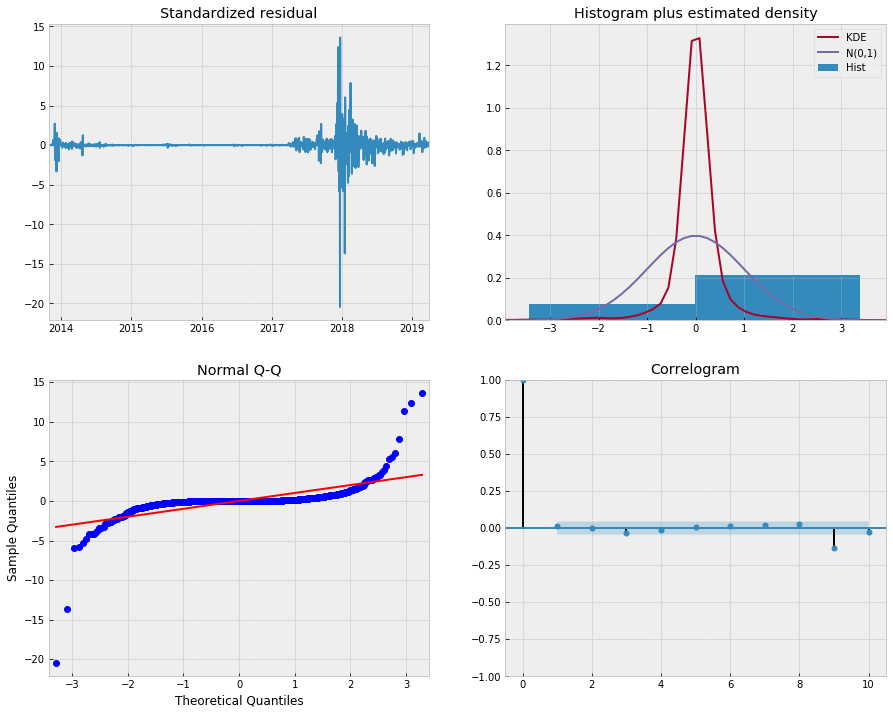

In [37]:
mod_baseline = sm.tsa.statespace.SARIMAX(y,
                                order=(3, 1, 3),
                                seasonal_order = (0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_baseline = mod_baseline.fit()

print(results_baseline.summary().tables[1])
print(results_baseline.aic)
b = results_baseline.plot_diagnostics(figsize=(15, 12))

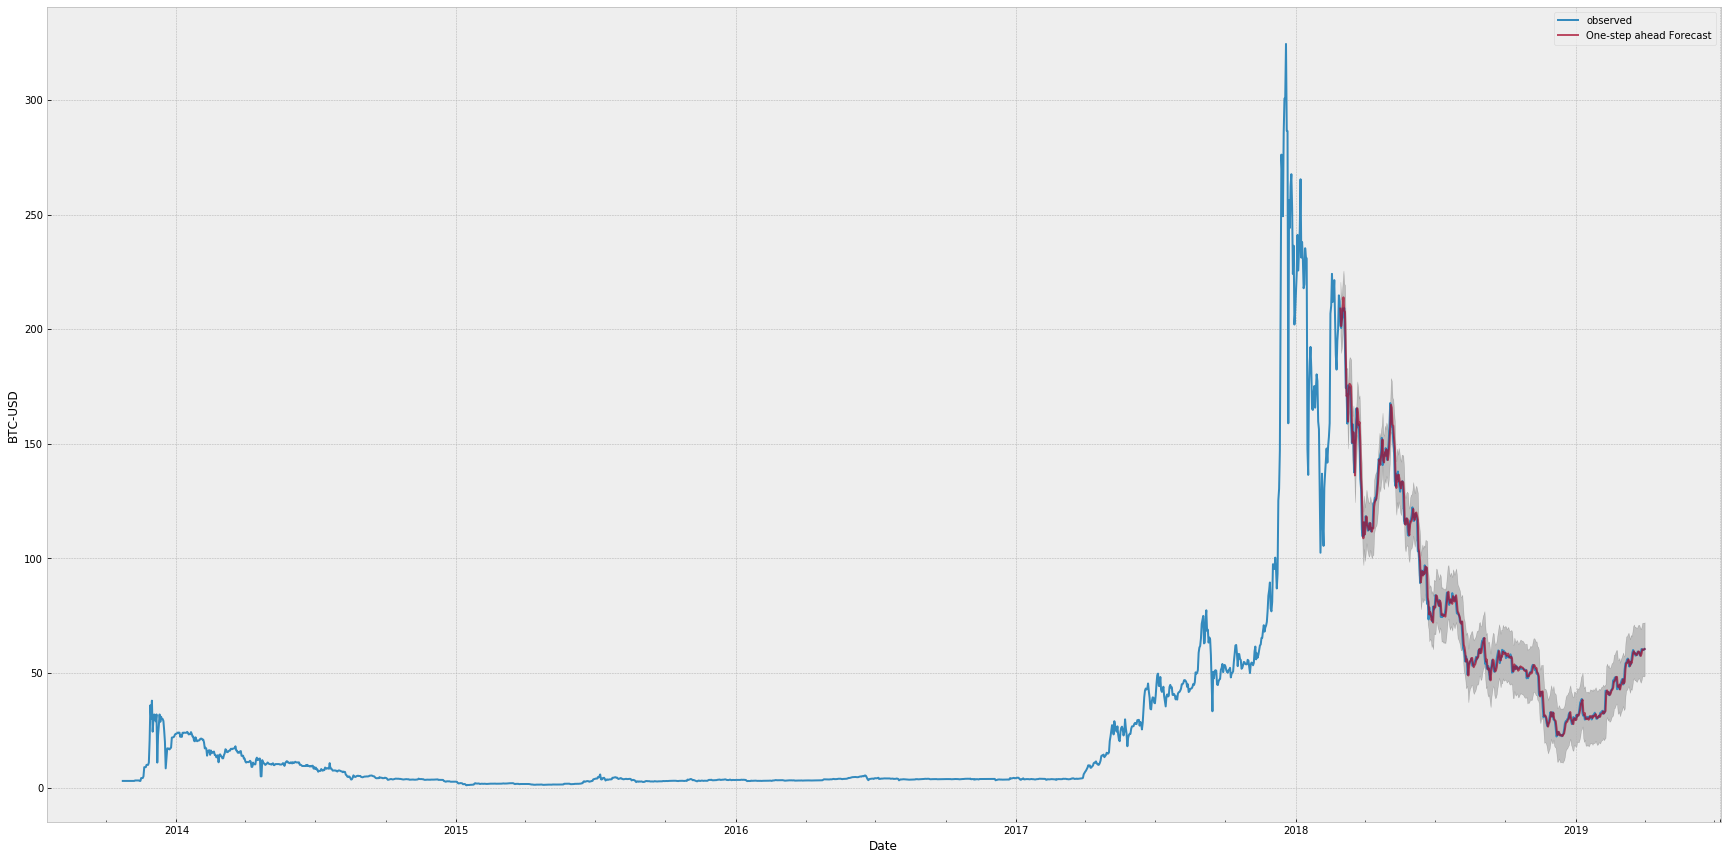

In [38]:
pred = results_baseline.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [39]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 15.9869
The R2 of our model is 0.9915


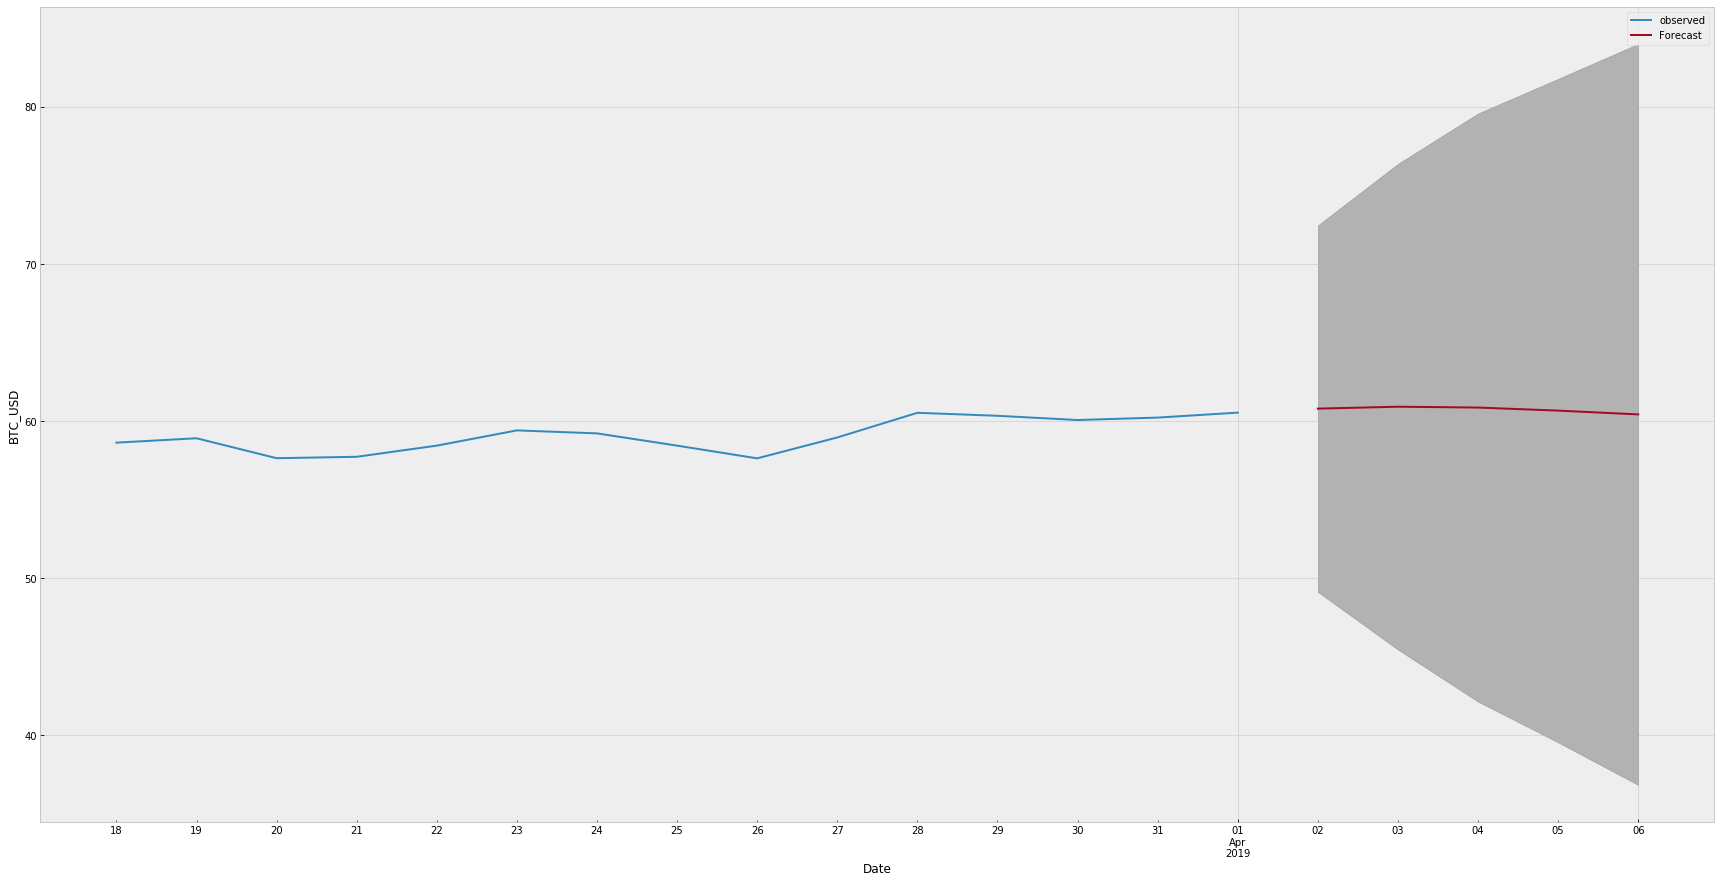

In [40]:
# Forcast the future
pred_uc = results_baseline.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

### Build an Advanced Model by Grid Search

In [41]:
d = [1]
p = q = range(21)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(0, 0, 0, 12)]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-1], seasonal_pdq[0]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 0, 0, 12)
SARIMAX: (0, 1, 2) x (0, 0, 0, 12)
SARIMAX: (20, 1, 19) x (0, 0, 0, 12)
SARIMAX: (20, 1, 20) x (0, 0, 0, 12)


In [42]:
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)

        except:
            continue

print('Finished...')

AIC_list = AIC_list.dropna()
m = np.amin(AIC_list['AIC'].values) # Find the minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find the index number of the lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]

ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:12795.924880916591
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:12767.386635543608
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:12762.181485174178
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:12738.15533402784
ARIMA(0, 1, 4)x(0, 0, 0, 12)12 - AIC:12731.008965163168
ARIMA(0, 1, 5)x(0, 0, 0, 12)12 - AIC:12726.943139070208
ARIMA(0, 1, 6)x(0, 0, 0, 12)12 - AIC:12718.464092989689
ARIMA(0, 1, 7)x(0, 0, 0, 12)12 - AIC:12712.756069127543
ARIMA(0, 1, 8)x(0, 0, 0, 12)12 - AIC:12705.647642876873
ARIMA(0, 1, 9)x(0, 0, 0, 12)12 - AIC:12604.540298323971
ARIMA(0, 1, 10)x(0, 0, 0, 12)12 - AIC:12600.898780972573
ARIMA(0, 1, 11)x(0, 0, 0, 12)12 - AIC:12573.935907232351
ARIMA(0, 1, 12)x(0, 0, 0, 12)12 - AIC:12565.379316181894
ARIMA(0, 1, 13)x(0, 0, 0, 12)12 - AIC:12558.83740420306
ARIMA(0, 1, 14)x(0, 0, 0, 12)12 - AIC:12555.481791880955
ARIMA(0, 1, 15)x(0, 0, 0, 12)12 - AIC:12549.195021593801
ARIMA(0, 1, 16)x(0, 0, 0, 12)12 - AIC:12545.744966059106
ARIMA(0, 1, 17)x(0, 0, 0, 12)12 - AIC:12523

ARIMA(6, 1, 20)x(0, 0, 0, 12)12 - AIC:12469.178607630196
ARIMA(7, 1, 0)x(0, 0, 0, 12)12 - AIC:12713.74965031022
ARIMA(7, 1, 1)x(0, 0, 0, 12)12 - AIC:12715.039811008743
ARIMA(7, 1, 2)x(0, 0, 0, 12)12 - AIC:12645.00114956976
ARIMA(7, 1, 3)x(0, 0, 0, 12)12 - AIC:12707.837654001964
ARIMA(7, 1, 4)x(0, 0, 0, 12)12 - AIC:12700.752464398207
ARIMA(7, 1, 5)x(0, 0, 0, 12)12 - AIC:12686.440120790527
ARIMA(7, 1, 6)x(0, 0, 0, 12)12 - AIC:12614.528529284591
ARIMA(7, 1, 7)x(0, 0, 0, 12)12 - AIC:12570.464307643157
ARIMA(7, 1, 8)x(0, 0, 0, 12)12 - AIC:12566.684462780711
ARIMA(7, 1, 9)x(0, 0, 0, 12)12 - AIC:12561.284122728901
ARIMA(7, 1, 10)x(0, 0, 0, 12)12 - AIC:12553.813410375857
ARIMA(7, 1, 11)x(0, 0, 0, 12)12 - AIC:12550.566731139945
ARIMA(7, 1, 12)x(0, 0, 0, 12)12 - AIC:12524.113405628663
ARIMA(7, 1, 13)x(0, 0, 0, 12)12 - AIC:12523.9155393449
ARIMA(7, 1, 14)x(0, 0, 0, 12)12 - AIC:12516.379375278084
ARIMA(7, 1, 15)x(0, 0, 0, 12)12 - AIC:12512.988840336762
ARIMA(7, 1, 16)x(0, 0, 0, 12)12 - AIC:12492.7

ARIMA(13, 1, 18)x(0, 0, 0, 12)12 - AIC:12479.58750680506
ARIMA(13, 1, 19)x(0, 0, 0, 12)12 - AIC:12445.564058700947
ARIMA(13, 1, 20)x(0, 0, 0, 12)12 - AIC:12439.295138255762
ARIMA(14, 1, 0)x(0, 0, 0, 12)12 - AIC:12616.627061356037
ARIMA(14, 1, 1)x(0, 0, 0, 12)12 - AIC:12602.69273735178
ARIMA(14, 1, 2)x(0, 0, 0, 12)12 - AIC:12603.423615069556
ARIMA(14, 1, 3)x(0, 0, 0, 12)12 - AIC:12567.174348202094
ARIMA(14, 1, 4)x(0, 0, 0, 12)12 - AIC:12571.399316608522
ARIMA(14, 1, 5)x(0, 0, 0, 12)12 - AIC:12556.711701087639
ARIMA(14, 1, 6)x(0, 0, 0, 12)12 - AIC:12571.755499288183
ARIMA(14, 1, 7)x(0, 0, 0, 12)12 - AIC:29224.674370211316
ARIMA(14, 1, 8)x(0, 0, 0, 12)12 - AIC:12583.016724426234
ARIMA(14, 1, 9)x(0, 0, 0, 12)12 - AIC:12509.737632055096
ARIMA(14, 1, 10)x(0, 0, 0, 12)12 - AIC:12502.600137843912
ARIMA(14, 1, 11)x(0, 0, 0, 12)12 - AIC:12512.333123660179
ARIMA(14, 1, 12)x(0, 0, 0, 12)12 - AIC:12527.198246828008
ARIMA(14, 1, 13)x(0, 0, 0, 12)12 - AIC:12490.903666026348
ARIMA(14, 1, 14)x(0, 0, 0,

ARIMA(20, 1, 14)x(0, 0, 0, 12)12 - AIC:12415.715193431191
ARIMA(20, 1, 15)x(0, 0, 0, 12)12 - AIC:12437.772609936015
ARIMA(20, 1, 16)x(0, 0, 0, 12)12 - AIC:12426.631686535131
ARIMA(20, 1, 17)x(0, 0, 0, 12)12 - AIC:12427.273391581653
ARIMA(20, 1, 18)x(0, 0, 0, 12)12 - AIC:12441.66357625856
ARIMA(20, 1, 19)x(0, 0, 0, 12)12 - AIC:12430.867044159688
ARIMA(20, 1, 20)x(0, 0, 0, 12)12 - AIC:12409.165390351074
Finished...


### Min_AIC_list ### 
param               (18, 1, 19)
param_seasonal    (0, 0, 0, 12)
AIC                     12406.6
Name: 397, dtype: object
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0527      0.379     -0.139      0.890      -0.796       0.691
ar.L2         -0.5821      0.383     -1.519      0.129      -1.333       0.169
ar.L3          0.0767      0.558      0.137      0.891      -1.018       1.171
ar.L4         -0.1957      0.492     -0.397      0.691      -1.161       0.769
ar.L5          0.1732      0.515      0.336      0.737      -0.837       1.183
ar.L6          0.3639      0.407      0.893      0.372      -0.435       1.162
ar.L7         -0.2501      0.257     -0.971      0.331      -0.755       0.255
ar.L8          0.3332      0.310      1.074      0.283      -0.275       0.941
ar.L9         -0.0650      0.199     -0.327      0.744      -0.455 

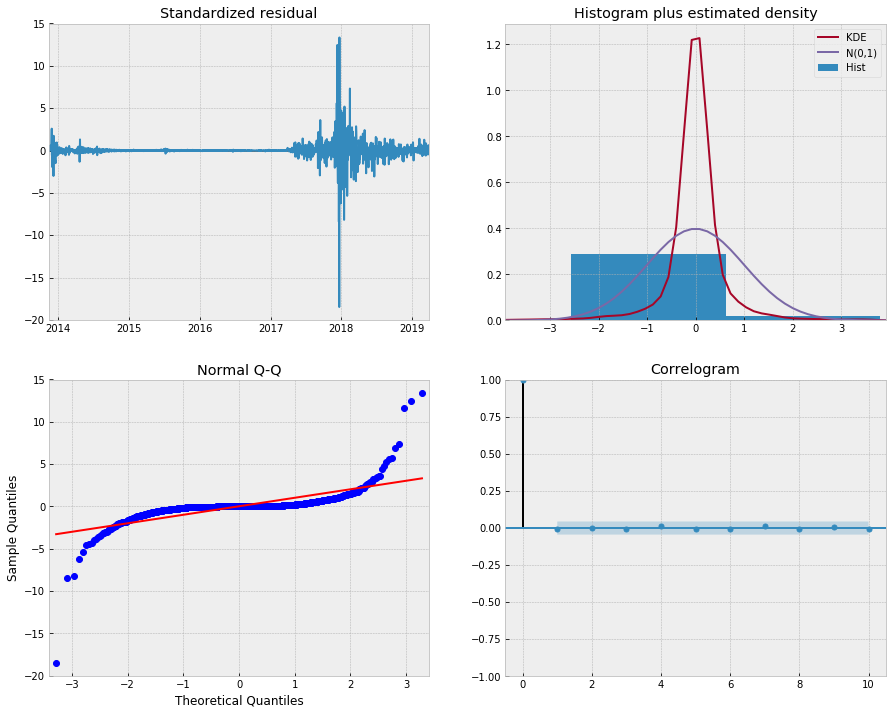

In [43]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])
dia = results.plot_diagnostics(figsize=(15, 12))

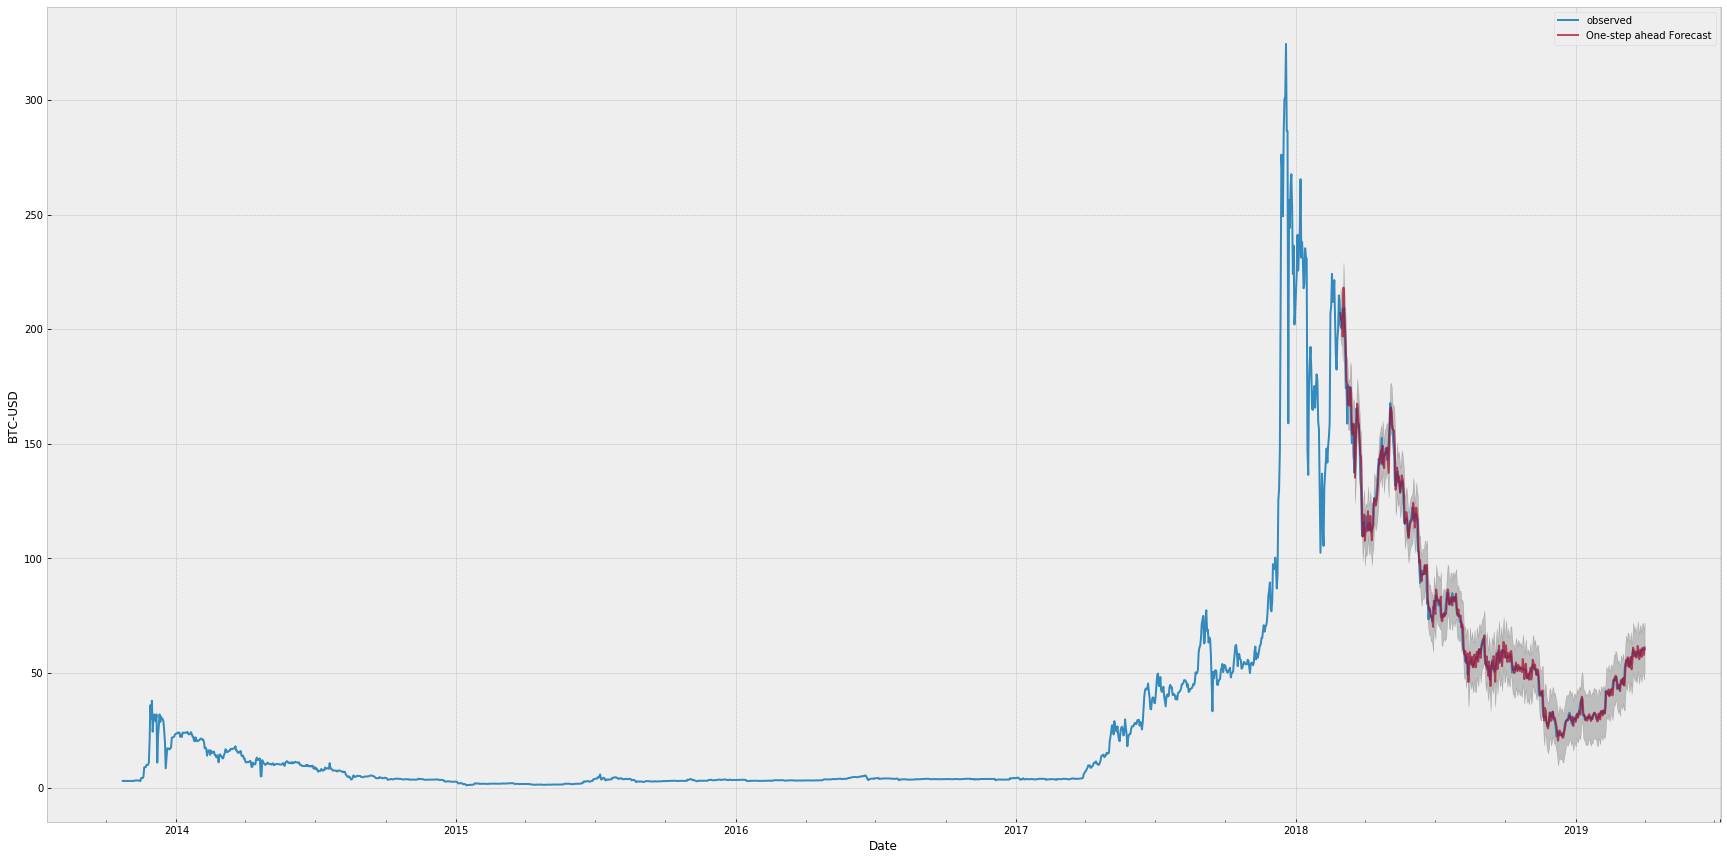

In [44]:
pred = results.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [45]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 19.3148
The R2 of our model is 0.9898


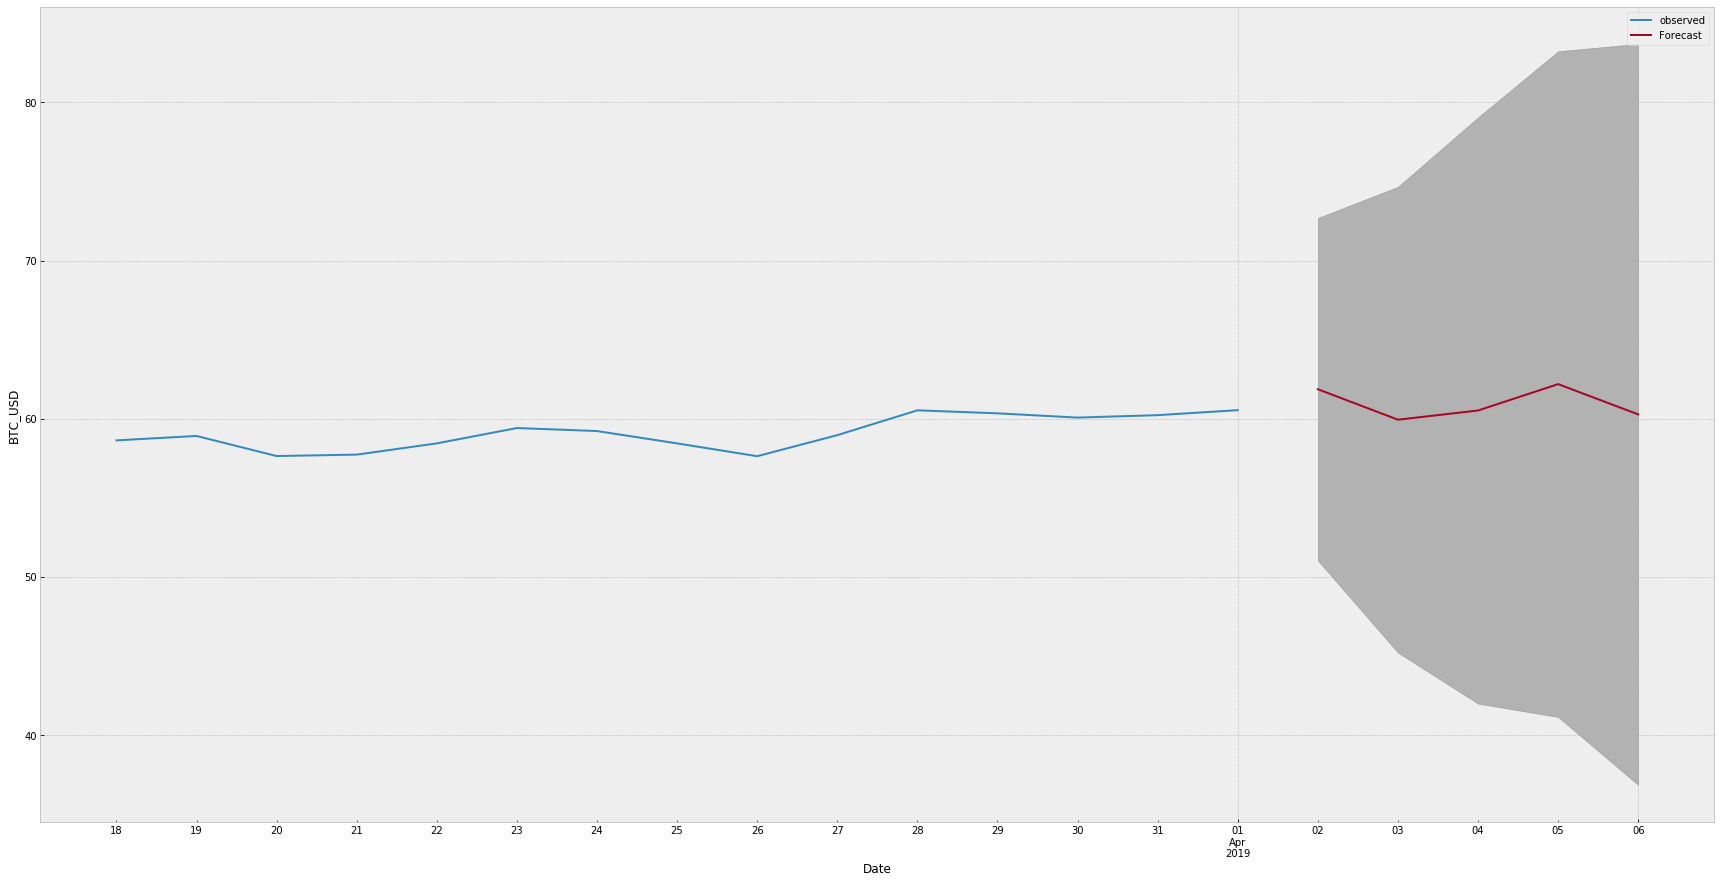

In [46]:
# Forcast the future
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

#### The advanced model fails to outperform the baseline model.